In [1]:
#!/usr/bin/env python3

import tables
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!pwd

## Data preprocessing

In [2]:
def binned_histogram_Areakey(xdata, Eff_A, error, bins=11, quant=68, logspace=True):
    """
    input: xdata and the corresponding percentage error. as np.array
    return: return the bin centers, mean and std of in each bin.
    bins : Number of bins. Shoud be an interger not a list. or array.
    """
    if logspace:
        bins = np.logspace(np.log10(np.min(xdata)), np.log10(np.max(xdata)), bins)
    else:
        bins = np.linspace(np.min(xdata), np.max(xdata), bins)
    
    centers = (bins[1:] + bins[:-1]) / 2.0
    lower = centers - bins[:-1]
    upper = bins[1:] - centers
    
    merit_numbers = []
    
    for lower, upper in zip(bins[:-1], bins[1:]):
        cut = (xdata >= lower) & (xdata < upper)
        
        error_distribution = error[cut]
        energy_distribution = xdata[cut]
        effA = Eff_A[cut]
        
        merit_number = with_AreaKey(error_distribution, effA)
        
        merit_numbers.append(merit_number)
    return (
        centers,
        np.array(merit_numbers)
    )

In [5]:
def with_AreaKey(angular_error, Effective_area):
    val = (np.sum(Effective_area/(4*np.pi*angular_error**2))**(1/2))
    return val

In [6]:
def get_pure_data(file):
    f = tables.open_file(file)
    
    data_dict = {
        #'event_id': file.root.event_id.cols.value[:],

        #'angular_error_linefit' : np.degrees(file.root.angular_error_linefit.cols.value[:]),
        'angular_error_mmsreco': np.degrees(f.root.angular_error_LLHFit_mmsreco.cols.value[:]),
        #'angular_error_splines_35ns': np.degrees(file.root.angular_error_LLHFit_step1.cols.value[:]),
        #'angular_error_splines_20ns': np.degrees(file.root.angular_error_LLHFit_step2.cols.value[:]),
        #'angular_error_splines_10ns': np.degrees(file.root.angular_error_LLHFit_step3.cols.value[:]),
        #'angular_error_splines_05ns': np.degrees(file.root.angular_error_LLHFit_step4.cols.value[:]),

        #'logl_splines_35ns': file.root.logl_splines_35ns.cols.value[:],
        #'logl_splines_20ns': file.root.logl_splines_20ns.cols.value[:],
        #'logl_splines_10ns': file.root.logl_splines_10ns.cols.value[:],
        #'logl_splines_05ns': file.root.logl_splines_05ns.cols.value[:],
        #'logl_mmsreco': file.root.logl_mmsreco.cols.value[:],
        #'logl_mctruth': file.root.logl_mctruth.cols.value[:],
        #'nchannels_count': file.root.nchannels_count.cols.value[:],
        #'qtotal_clean': file.root.qtotal_clean.cols.value[:],
        #'qtotal_unclean': file.root.qtotal_unclean.cols.value[:],
        #'nhits_clean': file.root.nhits_clean.cols.value[:],
        #'nhits_unclean': file.root.nhits_unclean.cols.value[:],
        #'zenith_angle': np.degrees(file.root.zenith_angle.cols.value[:]),
        #'numu_energy': file.root.numu_energy.cols.value[:],
        'MuonEffectiveArea': f.root.MuonEffectiveArea.cols.value[:],
        'muon_energy': f.root.muon_energy.cols.value[:],
        'dirTrackLengthA_reco': f.root.track_length.cols.value[:]
    }
    
    df = pd.DataFrame(data_dict)
    df = df.dropna()
    
    log_bin, merit_number = binned_histogram_Areakey(xdata = df.muon_energy,
                                            Eff_A = df.MuonEffectiveArea,
                                            error=df.angular_error_mmsreco, 
                                            bins=11, 
                                            quant=68,
                                            logspace=True)
    return log_bin, merit_number

# Original Multi-Cell method #

In [9]:
# slashes have to be backwards in path
f = tables.open_file("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_sim0002_waterfits_EffectiveArea.hdf5")
f.root

/ (RootGroup) ''
  children := ['__I3Index__' (Group), 'MuonEffectiveArea' (Table), 'angular_error_LLHFit_mmsreco' (Table), 'angular_error_LLHFit_step1' (Table), 'angular_error_LLHFit_step2' (Table), 'angular_error_LLHFit_step3' (Table), 'angular_error_LLHFit_step4' (Table), 'angular_error_linefit' (Table), 'event_id' (Table), 'logl_mmsreco' (Table), 'logl_splines_05ns' (Table), 'logl_splines_10ns' (Table), 'logl_splines_20ns' (Table), 'logl_splines_35ns' (Table), 'muon_energy' (Table), 'nchannels_count' (Table), 'nhits_clean' (Table), 'nhits_unclean' (Table), 'qtotal_clean' (Table), 'qtotal_unclean' (Table), 'track_length' (Table), 'zenith_angle' (Table)]

In [ ]:
data_dict = {
    #'event_id': file.root.event_id.cols.value[:],

    #'angular_error_linefit' : np.degrees(file.root.angular_error_linefit.cols.value[:]),
    'angular_error_mmsreco': np.degrees(f.root.angular_error_LLHFit_mmsreco.cols.value[:]),
    #'angular_error_splines_35ns': np.degrees(file.root.angular_error_LLHFit_step1.cols.value[:]),
    #'angular_error_splines_20ns': np.degrees(file.root.angular_error_LLHFit_step2.cols.value[:]),
    #'angular_error_splines_10ns': np.degrees(file.root.angular_error_LLHFit_step3.cols.value[:]),
    #'angular_error_splines_05ns': np.degrees(file.root.angular_error_LLHFit_step4.cols.value[:]),

    #'logl_splines_35ns': file.root.logl_splines_35ns.cols.value[:],
    #'logl_splines_20ns': file.root.logl_splines_20ns.cols.value[:],
    #'logl_splines_10ns': file.root.logl_splines_10ns.cols.value[:],
    #'logl_splines_05ns': file.root.logl_splines_05ns.cols.value[:],
    #'logl_mmsreco': file.root.logl_mmsreco.cols.value[:],
    #'logl_mctruth': file.root.logl_mctruth.cols.value[:],
    #'nchannels_count': file.root.nchannels_count.cols.value[:],
    #'qtotal_clean': file.root.qtotal_clean.cols.value[:],
    #'qtotal_unclean': file.root.qtotal_unclean.cols.value[:],
    #'nhits_clean': file.root.nhits_clean.cols.value[:],
    #'nhits_unclean': file.root.nhits_unclean.cols.value[:],
    #'zenith_angle': np.degrees(file.root.zenith_angle.cols.value[:]),
    #'numu_energy': file.root.numu_energy.cols.value[:],
    'MuonEffectiveArea': f.root.MuonEffectiveArea.cols.value[:],
    'muon_energy': f.root.muon_energy.cols.value[:],
    'dirTrackLengthA_reco': f.root.track_length.cols.value[:]
}

In [18]:
df = pd.DataFrame(data_dict)
df = df.dropna()
df

,angular_error_mmsreco,MuonEffectiveArea,muon_energy,dirTrackLengthA_reco
0,0.135597,9.734735e+10,82413.121514,257.512445
1,34.695274,6.004455e+10,50449.818443,135.333762
3,2.103542,7.693895e+10,64925.967136,238.682905
4,35.217937,8.055803e+09,5902.700981,177.183219
5,0.009549,9.633965e+11,824496.665193,938.181358
...,...,...,...,...
58981,0.009737,2.236337e+11,190622.926582,1087.936516
58982,19.961458,3.639989e+10,30189.636449,93.787862
58983,0.050392,1.403944e+11,119298.453314,159.376226
58984,0.021210,1.562260e+11,132863.936810,643.433948


In [13]:
log_bin, merit_number = binned_histogram_Areakey(xdata = df.muon_energy,
                                            Eff_A = df.MuonEffectiveArea,
                                         error=df.angular_error_mmsreco, 
                                         bins=11, 
                                         quant=68,
                                         logspace=True)
print(merit_number)

[5.33664105e+04 4.60517346e+05 2.00694816e+06 7.07523445e+06
 1.82009644e+07 6.73027370e+07 1.41980998e+08 7.24323674e+08
 4.15026776e+08 8.47909245e+08]


# Using Pure Data function to get graphing data #

In [8]:
log_bin, merit_number = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_sim0002_waterfits_EffectiveArea.hdf5")
print(merit_number)

[5.33664105e+04 4.60517346e+05 2.00694816e+06 7.07523445e+06
 1.82009644e+07 6.73027370e+07 1.41980998e+08 7.24323674e+08
 4.15026776e+08 8.47909245e+08]


In [19]:
log_bin_large, merit_number_large = get_pure_data('C:/Users/brayd/Documents/single_muons_muongun_reco_spline_large_array_EffectiveArea.hdf5')
print(merit_number_large)

[4.08190305e+03 2.13082982e+04 3.63684444e+05 9.84666322e+05
 3.81514434e+06 4.38527839e+07 7.94883659e+07 2.08114304e+08
 5.16932071e+08 1.19315324e+09]


In [20]:
log_bin_large2, merit_number_large2 = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_large_array2_EffectiveArea.hdf5")
print(merit_number_large2)

[1.79787165e+04 1.68127977e+05 1.21242510e+06 3.28951157e+06
 5.38250725e+07 3.25644864e+07 6.26067105e+07 1.56987192e+08
 4.67625301e+08 8.67188493e+08]


In [21]:
log_bin_tan, merit_number_tan = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_tanGCD_effectiveArea.hdf5")
print(merit_number_tan)

[4.12773572e+04 2.95825430e+05 6.41105722e+06 4.61360179e+06
 1.65430438e+07 6.32305299e+07 1.11367450e+08 2.32534522e+08
 4.90639785e+08 1.20437455e+09]


In [26]:
log_bin_rec, merit_number_rec = get_pure_data("C:/Users/brayd/Documents/single_muons_muongun_reco_spline_recGCD_EffectiveArea.hdf5")

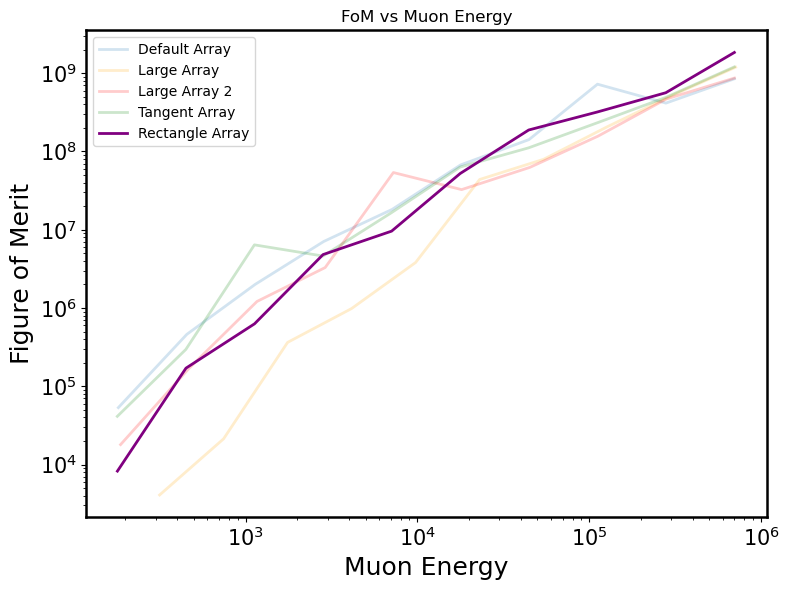

<Figure size 640x480 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(log_bin, merit_number, lw=2, label = 'Default Array', alpha = 0.2)
ax.plot(log_bin_large, merit_number_large, lw = 2, c = 'orange', label = 'Large Array', alpha = 0.2)
ax.plot(log_bin_large2, merit_number_large2, lw = 2, c = 'red', label = 'Large Array 2', alpha = 0.2)
ax.plot(log_bin_tan, merit_number_tan, lw = 2, c = 'green', label = 'Tangent Array', alpha = 0.2)
ax.plot(log_bin_rec, merit_number_rec, lw = 2, c = 'purple', label = 'Rectangle Array')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.8)
    ax.spines[axis].set_color('0.0')
    ax.spines[axis].set_linewidth(1.8)
    ax.spines[axis].set_color('0.0')

ax.set_xlabel("Muon Energy", fontsize=18)
ax.set_ylabel("Figure of Merit", fontsize=18)
    
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('FoM vs Muon Energy')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.tight_layout()

plt.show()
plt.savefig(fname = 'First4.png', format = 'png');

What is effective area part, should know how individual parts of product look

* Trigger could be causing weirdness, need ratio of simulated events to recorded events. May not know injected events?
simulated events should be input, trigger could be losing events due to low energy. I know how much should be there
* Nevents - look at per file, need number of files.

## Plotting per track length

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

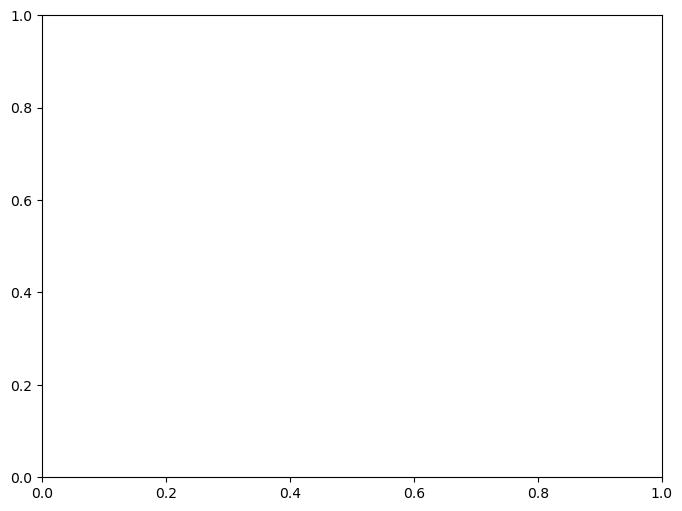

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

for LDir in [0, 100, 200, 400, 700]:
    data = df.loc[(df['dirTrackLengthA_reco'] > LDir)]
    muon_energy = data.muon_energy
    
    angular_error_mmsreco = data.angular_error_mmsreco
    
    log_bin, merit_number = binned_histogram_Areakey(xdata = muon_energy,
                                         Eff_A = df.MuonEffectiveArea,
                                         error = angular_error_mmsreco, 
                                         bins = 11, 
                                         quant = 68,
                                         logspace = True)

    ax.plot(log_bin, merit_number, label = f'track length > {LDir} m', lw=2)
    
    ax.set_xlabel("Muon Energy", fontsize=18)
    ax.set_ylabel("Merit value", fontsize=18)
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.8)
        ax.spines[axis].set_color('0.0')
        ax.spines[axis].set_linewidth(1.8)
        ax.spines[axis].set_color('0.0')
    
    ax.set_xscale('log')
    ax.legend()
plt.show()